# Statistical and Computational Lab

### Collaborators
    Siddharth Das     (2017120011)
    Anushka Chintrate (2018220066)
    Sonal Kamble      (2018220068)
#### Mentor
    Prof. Dayanand Ambawade

## START

In [1]:
import os
os.getcwd()

'/home/nbuser/library'

In [2]:
!pip install docx2txt

In [3]:
import docx2txt
description = docx2txt.process('./Autism-Screening-Adult-Data Description.docx')
print(description)

Data Set Name: Autistic Spectrum Disorder Screening Data for Adult  

Abstract: Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process

### Load python modules 

In [4]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.simplefilter('ignore')

### Load dataset

In [6]:
# Do not use 'DATASET' directly; make a copy to avoid making changes to the original file.
DATASET = pd.read_csv('./Toddler Autism dataset July 2018.csv')

In [7]:
# For an added layer of abstract protection
data = DATASET

# Use this dataframe
df = data

### EDA

In [8]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [9]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
Case_No                   1054 non-null int64
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
Class/ASD Traits          1054 non-null object
dtypes: int64

### Label encode

In [11]:
# Label encoding helps in handling the categorical variables elegantly

print('\nWho completed the test:- \n\t',
      df['Who completed the test'].unique(),
      '\nFamily_mem_with_ASD:- \n\t',
      df['Family_mem_with_ASD'].unique(),
      '\nJaundice:- \n\t',
      df['Jaundice'].unique(),
      '\nEthnicity:- \n\t',
      df['Ethnicity'].unique(),
      '\nSex:- \n\t',
      df['Sex'].unique(),
      '\nQchat-10-Score:- \n\t',
      df['Qchat-10-Score'].unique(),
      '\nAge_Mons:- \n\t',
      df['Age_Mons'].unique())


Who completed the test:- 
	 ['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others'] 
Family_mem_with_ASD:- 
	 ['no' 'yes'] 
Jaundice:- 
	 ['yes' 'no'] 
Ethnicity:- 
	 ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'] 
Sex:- 
	 ['f' 'm'] 
Qchat-10-Score:- 
	 [ 3  4 10  9  8  5  6  2  0  7  1] 
Age_Mons:- 
	 [28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]


In [12]:
# Import label encoder 
from sklearn import preprocessing 
 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
print(df['Sex'].unique())
df['Sex']= label_encoder.fit_transform(df['Sex']) 
print(df['Sex'].unique(), '\n')

print(df['Ethnicity'].unique())
df['Ethnicity']= label_encoder.fit_transform(df['Ethnicity']) 
print(df['Ethnicity'].unique(), '\n')

print(df['Jaundice'].unique())
df['Jaundice']= label_encoder.fit_transform(df['Jaundice']) 
print(df['Jaundice'].unique(), '\n')

print(df['Family_mem_with_ASD'].unique())
df['Family_mem_with_ASD']= label_encoder.fit_transform(df['Family_mem_with_ASD']) 
print(df['Family_mem_with_ASD'].unique(), '\n')

print(df['Who completed the test'].unique())
df['Who completed the test']= label_encoder.fit_transform(df['Who completed the test']) 
print(df['Who completed the test'].unique(), '\n')

['f' 'm']
[0 1] 

['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']
[ 8  5  0  7  6 10  2  3  1  9  4] 

['yes' 'no']
[1 0] 

['no' 'yes']
[0 1] 

['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']
[4 0 1 3 2] 



In [13]:
df.sample(n=5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
849,850,0,0,0,0,0,1,1,1,1,0,36,4,1,6,0,0,4,Yes
574,575,0,1,1,1,1,0,1,1,0,1,36,7,0,5,1,1,4,Yes
389,390,1,0,0,0,0,1,0,1,0,0,25,3,1,5,0,0,4,No
950,951,1,1,1,1,1,1,1,1,0,1,27,9,1,7,0,1,4,Yes
304,305,1,0,1,1,0,1,1,1,1,0,36,7,1,5,0,0,4,Yes


### Logistic regression

In [14]:
# split dataset in features and target variable
feature_cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons', 
                'Qchat-10-Score', 'Sex', 'Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test','Class/ASD Traits ']

# Features
X = df.iloc[:,1:17]

# Target variable
y = df.iloc[:,18]

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [15]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [16]:
# fit the model
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 99,   6],
       [  0, 212]])

### Random forest classifier

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X1=df[['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test']]  # Features
y1=df['Class/ASD Traits ']  # Labels

# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) # 70% training and 30% test

In [20]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, criterion='entropy')

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

y1_pred=clf.predict(X1_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

#predict
clf.predict([[522, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 19, 5, 1, 1, 0, 0, 1]])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 1.0


array(['Yes'], dtype=object)

### Feature extraction

In [21]:
# Know the features' relative score with each other
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Sex                       0.519342
A10                       0.125684
A7                        0.054240
A8                        0.048884
A5                        0.048293
A6                        0.044331
A3                        0.038912
A9                        0.029527
A2                        0.028963
A4                        0.012682
Qchat-10-Score            0.012503
A1                        0.011637
Age_Mons                  0.008206
Jaundice                  0.007396
Family_mem_with_ASD       0.003590
Ethnicity                 0.002218
Who completed the test    0.002047
Class/ASD Traits          0.001544
dtype: float64

No handles with labels found to put in legend.


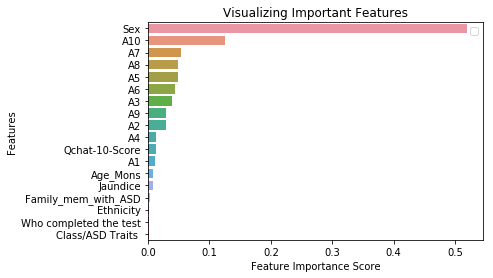

In [22]:
# Visualize using matplotlib and seaborn
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Generating the model based on selected features

In [23]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X2=df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Family_mem_with_ASD', 'Who completed the test']]
      # Removed feature "'Jaundice', 'Case_no', 'Ethnicity'"
y2=df['Class/ASD Traits '] # Target
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.70, random_state=5) # 70% training and 30% test

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Compare with previous version of model

In [24]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X2_train,y2_train)

# prediction on test set
y2_pred=clf.predict(X2_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 1.0


In [25]:
# import the metrics class
# from sklearn import metrics # done already
cnf_matrix2 = metrics.confusion_matrix(y2_test, y2_pred)
cnf_matrix2

array([[225,   0],
       [  0, 513]])

### Result

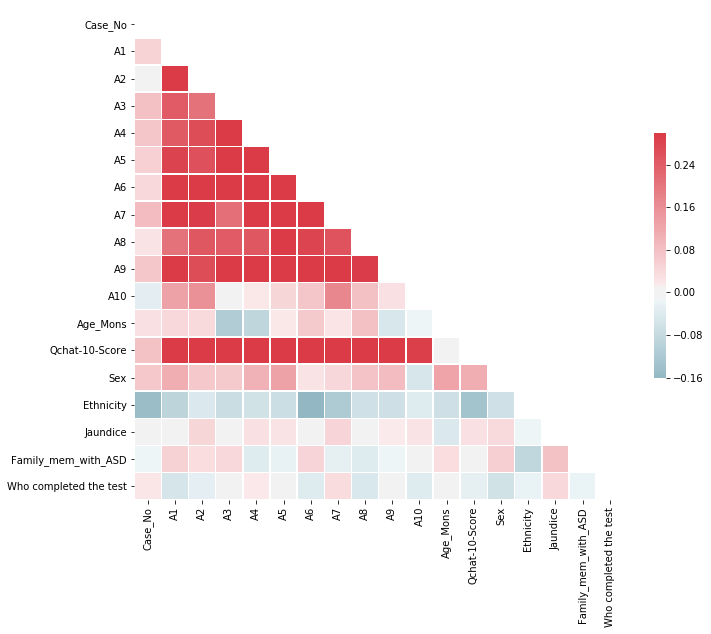

In [26]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5,257.44,'Predicted label')

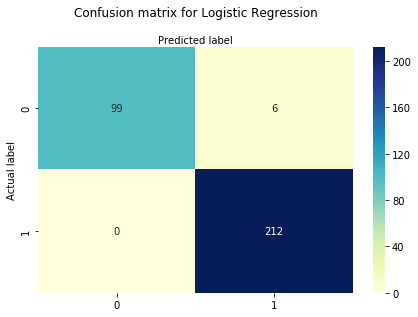

In [27]:
# Here you will visualize confusion matrix using heat map
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label')

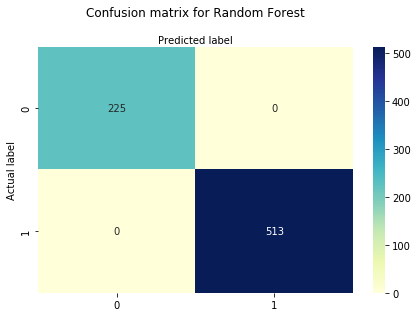

In [28]:
# Here you will visualize confusion matrix using heat map
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Conclusion

This simluation shows us the results of both the ML algorithms: 'Logistic Regression' and 'Random Forest'. 

Linear models are composed of one or multiple independent variables that describes a relationship to a dependent response variable. 
Mapping qualitative or quantitative input features to a target variable that is attempted to being predicted such as financial, biological, or sociological data is known as supervised learning in machine learning terminology if the labels are known. 
One of the most common utilized linear statistical models for discriminant analysis is logistic regression. 
This algorithm has poorer boundary mapping capability than the two. 
Logistic Regression gives up accuracy for model interpretability.

Random forest is an ensemble-based learning algorithm which is comprised of n collections of de-correlated decision trees. 
It is built off the idea of bootstrap aggregation, which is a method for resampling with replacement in order to reduce variance. 
Random Forest uses multiple trees to average (regression) or compute majority votes (classification) in the terminal leaf nodes when making a prediction. 
Built off the idea of decision trees, random forest models have resulted in significant improvements in prediction accuracy as compared to a single tree by growing 'n' number of trees; each tree in the training set is sampled randomly without replacement. 
Decision trees consist simply of a tree-like structure where the top node is considered the root of the tree that is recursively split at a series of decision nodes from the root until the terminal node or decision node is reached. 
This algorithm has a very good boundary shaping capability.
Random Forest sacrifices interpretability for accuracy of model.

So, applications where interpretation of the model is of importance, use Logistic Regerssion. While Random Forest is used for better model fitting on the data.